In [5444]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

In [5445]:
df = pd.read_csv('https://raw.githubusercontent.com/gagc056/Cousera-capstone-project/master/loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5446]:
### Convert to date time object

In [5447]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [5448]:
# Data visualization and pre-processing

In [5449]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

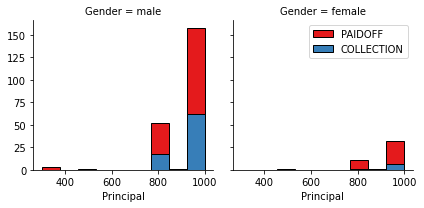

In [5450]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

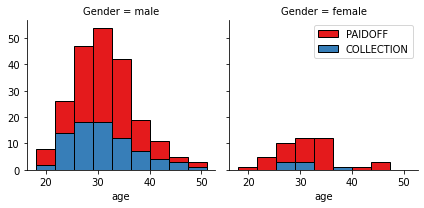

In [5451]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [5452]:
# Pre-processing:  Feature selection/extraction

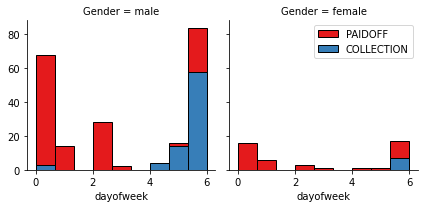

In [5453]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [5454]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [5455]:
## Convert Categorical features to numerical values

In [5456]:
####Let's convert male to 0 and female to 1:

In [5457]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [5458]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [5459]:
## One Hot Encoding
#### How about education?

In [5460]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [5461]:
#### Features before One Hot Encoding

In [5462]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [5463]:
#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame

In [5464]:
Feature = df[['dayofweek','Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,dayofweek,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,3,1000,30,45,0,0,0,1,0
1,3,1000,30,33,1,0,1,0,0
2,3,1000,15,27,0,0,0,0,1
3,4,1000,30,28,1,1,0,0,1
4,4,1000,30,29,0,1,0,0,1


In [5465]:
### Feature Selection

In [5466]:
#####Let's define feature sets, X:

In [5467]:
X = Feature
X[0:5]

,dayofweek,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,3,1000,30,45,0,0,0,1,0
1,3,1000,30,33,1,0,1,0,0
2,3,1000,15,27,0,0,0,0,1
3,4,1000,30,28,1,1,0,0,1
4,4,1000,30,29,0,1,0,0,1


In [5468]:
###What are our lables?

In [5469]:
y = df['loan_status'].replace(to_replace=['PAIDOFF', 'COLLECTION'], value=[0,1]).values
y[0:5]

array([0, 0, 0, 0, 0])

In [5470]:
## Normalize Data

In [5471]:
#####Data Standardization give data zero mean and unit variance (technically should be done after train test split)

In [5472]:
X=preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.26122054,  0.51578458,  0.92071769,  2.33152555, -0.42056004,
        -1.20577805, -0.38170062,  1.13639374, -0.86968108],
       [-0.26122054,  0.51578458,  0.92071769,  0.34170148,  2.37778177,
        -1.20577805,  2.61985426, -0.87997669, -0.86968108],
       [-0.26122054,  0.51578458, -0.95911111, -0.65321055, -0.42056004,
        -1.20577805, -0.38170062, -0.87997669,  1.14984679],
       [ 0.12175534,  0.51578458,  0.92071769, -0.48739188,  2.37778177,
         0.82934003, -0.38170062, -0.87997669,  1.14984679],
       [ 0.12175534,  0.51578458,  0.92071769, -0.3215732 , -0.42056004,
         0.82934003, -0.38170062, -0.87997669,  1.14984679]])

In [5473]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=70)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (259, 9) (259,)
Test set: (87, 9) (87,)


In [5474]:
# Classification

In [5475]:
# Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
#You should use the following algorithm:

#   K Nearest Neighbor(KNN)
#   Decision Tree
#   Support Vector Machine
#   Logistic Regression


0.8323221180364038


KNeighborsClassifier(n_neighbors=7)

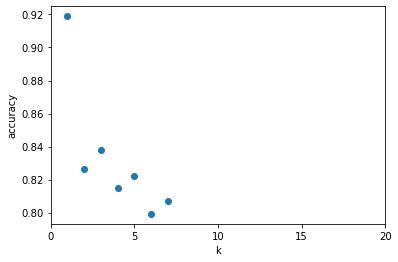

In [5476]:
#K Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
import statistics


k_range = range(1, 8)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_train, y_train))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
print(statistics.mean(scores))
knn


In [5477]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4, min_samples_leaf=5, random_state=42)
tree.fit(X_train,y_train)
tree



DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5,
                       random_state=42)

In [5478]:
# Support Vector Machine
from sklearn import svm
svm_cls = svm.SVC(C=1000, kernel='rbf', random_state=None, gamma=10)
svm_cls.fit(X_train, y_train)
svm_cls

SVC(C=1000, gamma=10)

In [5479]:
# Logistic Regression


In [5480]:
# Model Evaluation using Test set

In [5481]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [5482]:
### Load Test set for evaluation
test_df = pd.read_csv('https://raw.githubusercontent.com/gagc056/Cousera-capstone-project/master/loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male
